# Decision Tree

\In this section, we are trying to predict price using decision tress. Two decision trees were created:

- 1- Partial features
- 2- all features (full model)

\to find the model with the best accuracy, we will: 
- test different hyperparameters using GridSearch
- Check featue importance 
- Check partial dependence 


In [2]:
# !pip install pydotplus

In [3]:
# !pip install plotnine

In [64]:
# Helper packages

import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


# Modeling packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import partial_dependence


In [5]:
#use cleaned and dummified data for Flight dataset
df = pd.read_csv('./dt_encoded.csv')

In [6]:
df.columns

Index(['journey_month', 'journey_day', 'dep_hour', 'dep_min', 'Arrival_hour',
       'Arrival_min', 'Arrived_next_day', 'Duration_in_mins', 'price',
       'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'destination_Banglore', 'destination_Cochin',
       'destination_Delhi', 'destination_Hyderabad', 'destination_Kolkata',
       'source_Banglore', 'source_Chennai', 'source_Delhi', 'source_Kolkata',
       'source_Mumbai', '1 stop', '2 stops', '3 stops', '4 stops', 'non-stop',
       'departure_After noon', 'departure_early morning', 'departure_evening',
       'departure_late night', 'departure_morning', 'departure_night',
       'arrival_After noon', 'arrival_early morning', 'arrival_evening',
       'arrival_late night', 'arrival_morning', 'arrival_night', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'F

In [7]:
# create train/test split
train, test = train_test_split(df, train_size=0.7, random_state = 123)
# separate features and target
X_train = train.drop("price", axis = 1)
y_train = train[["price"]]

### Create Decision tree based on:
-  Departure
-  Destination 
-  airline

In [8]:

#create model object 
dt_mod = DecisionTreeRegressor(max_depth=5)
loss = 'neg_root_mean_squared_error'
#specify the features to be included in the model
dt_target_names = 'price'
dt_feature_names = ['destination_Banglore',
       'destination_Cochin', 'destination_Delhi', 'destination_Hyderabad',
       'destination_Kolkata','source_Banglore', 'source_Chennai',
       'source_Delhi', 'source_Kolkata', 'source_Mumbai', 'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy']


#fit/train model using 
dt_fit = dt_mod.fit(X_train[[str(s) for s in dt_feature_names]], y_train)



In [9]:
#how many leaf nodes? 
dt_fit.get_n_leaves()

11

[Text(1830.9375, 498.3, 'Jet Airways <= 0.5\nmse = 22441092.0\nsamples = 7323\nvalue = 9039.9'),
 Text(1220.625, 407.70000000000005, 'Jet Airways Business <= 0.5\nmse = 18339289.6\nsamples = 4738\nvalue = 7603.8'),
 Text(871.875, 317.1, 'Multiple carriers <= 0.5\nmse = 14948088.3\nsamples = 4732\nvalue = 7539.5'),
 Text(697.5, 226.5, 'Air India <= 0.5\nmse = 12324601.0\nsamples = 3897\nvalue = 6825.6'),
 Text(348.75, 135.89999999999998, 'destination_Cochin <= 0.5\nmse = 6226624.3\nsamples = 2724\nvalue = 5652.5'),
 Text(174.375, 45.299999999999955, 'mse = 5549378.7\nsamples = 2025\nvalue = 5150.0'),
 Text(523.125, 45.299999999999955, 'mse = 5337643.4\nsamples = 699\nvalue = 7108.3'),
 Text(1046.25, 135.89999999999998, 'source_Mumbai <= 0.5\nmse = 15868654.9\nsamples = 1173\nvalue = 9549.8'),
 Text(871.875, 45.299999999999955, 'mse = 13763430.9\nsamples = 1078\nvalue = 9819.7'),
 Text(1220.625, 45.299999999999955, 'mse = 29549347.5\nsamples = 95\nvalue = 6486.9'),
 Text(1046.25, 226.5, 

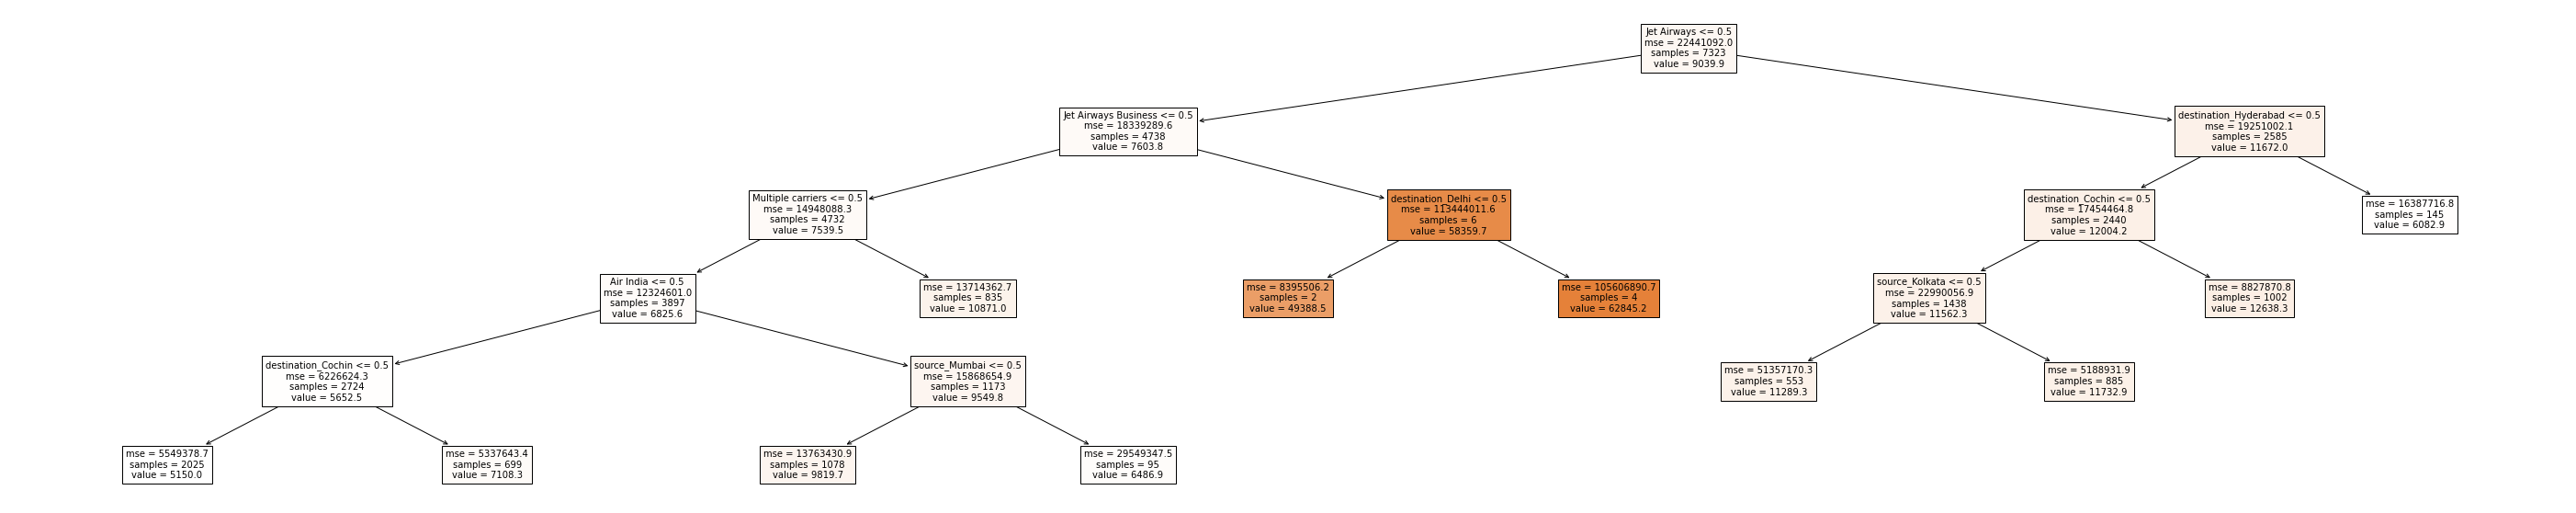

In [10]:
#plot the tree
plt.figure(figsize=(50, 10))
plot_tree(dt_fit, filled=True, precision= 1, fontsize= 10, feature_names=dt_feature_names)

## Kfold and hypergrid

In [11]:
# create 5 fold CV object
kfold = KFold(n_splits = 5, random_state = 123, shuffle = True)
results = cross_val_score(dt_mod, X_train[[str(s) for s in dt_feature_names]], y_train, cv=kfold, scoring = loss)
np.round(np.abs(results))

array([3465., 3262., 3382., 3604., 3612.])

In [12]:
#create grid of hyperparameter values 
hyper_grid = {
    'ccp_alpha': [1e-1, 1e-5, 1e-10],
    'max_depth': [14, 15, 16],
    'min_samples_split': [120, 125, 150]
}

In [13]:
grid_search = GridSearchCV(dt_mod, hyper_grid, cv = kfold, scoring = loss)
results = grid_search.fit(X_train[[str(s) for s in dt_feature_names]], y_train)
results.best_estimator_


DecisionTreeRegressor(ccp_alpha=0.1, max_depth=15, min_samples_split=120)

In [14]:
round(abs(results.best_score_), 2)

3387.13

In [15]:
# #plot the results 
# plt.figure() 
# plt.scatter(X_train, y_train, s=20, label="data")
# plt.ylabel("target (Price)")
# plt.xlabel("data")


In [16]:
# tree.export_graphviz(dt_fit, out_file='tree.dot', 
#     feature_names=dt_feature_names, class_names=dt_target_names,
#     filled=True)  
# graph = pydotplus.graph_from_dot_file('tree.dot')
# Image(graph.create_png())

## Full DT Model 

In [17]:

#create model object 
dt_mod = DecisionTreeRegressor(max_depth=5)
loss = 'neg_root_mean_squared_error'
dt_target_names = 'price'
dt_feature_names = X_train.columns


#fit/train model using 
dt_fit = dt_mod.fit(X_train[[str(s) for s in dt_feature_names]], y_train)



In [18]:
#how many leaf nodes? 
dt_fit.get_n_leaves()

25

[Text(1191.5625, 498.3, 'Duration_in_mins <= 297.5\nmse = 22441092.0\nsamples = 7323\nvalue = 9039.9'),
 Text(523.125, 407.70000000000005, 'Jet Airways Business <= 0.5\nmse = 5781978.1\nsamples = 2606\nvalue = 5122.3'),
 Text(465.0, 317.1, 'journey_day <= 3.5\nmse = 4742291.2\nsamples = 2605\nvalue = 5102.3'),
 Text(232.5, 226.5, 'journey_month <= 2.0\nmse = 13176229.1\nsamples = 266\nvalue = 7776.7'),
 Text(116.25, 135.89999999999998, 'destination_Banglore <= 0.5\nmse = 24930678.6\nsamples = 48\nvalue = 11726.0'),
 Text(58.125, 45.299999999999955, 'mse = 20275419.2\nsamples = 39\nvalue = 13112.9'),
 Text(174.375, 45.299999999999955, 'mse = 652276.2\nsamples = 9\nvalue = 5716.3'),
 Text(348.75, 135.89999999999998, 'non-stop <= 0.5\nmse = 6397655.0\nsamples = 218\nvalue = 6907.1'),
 Text(290.625, 45.299999999999955, 'mse = 18749284.7\nsamples = 19\nvalue = 10115.1'),
 Text(406.875, 45.299999999999955, 'mse = 4141965.6\nsamples = 199\nvalue = 6600.8'),
 Text(697.5, 226.5, 'Duration_in_mi

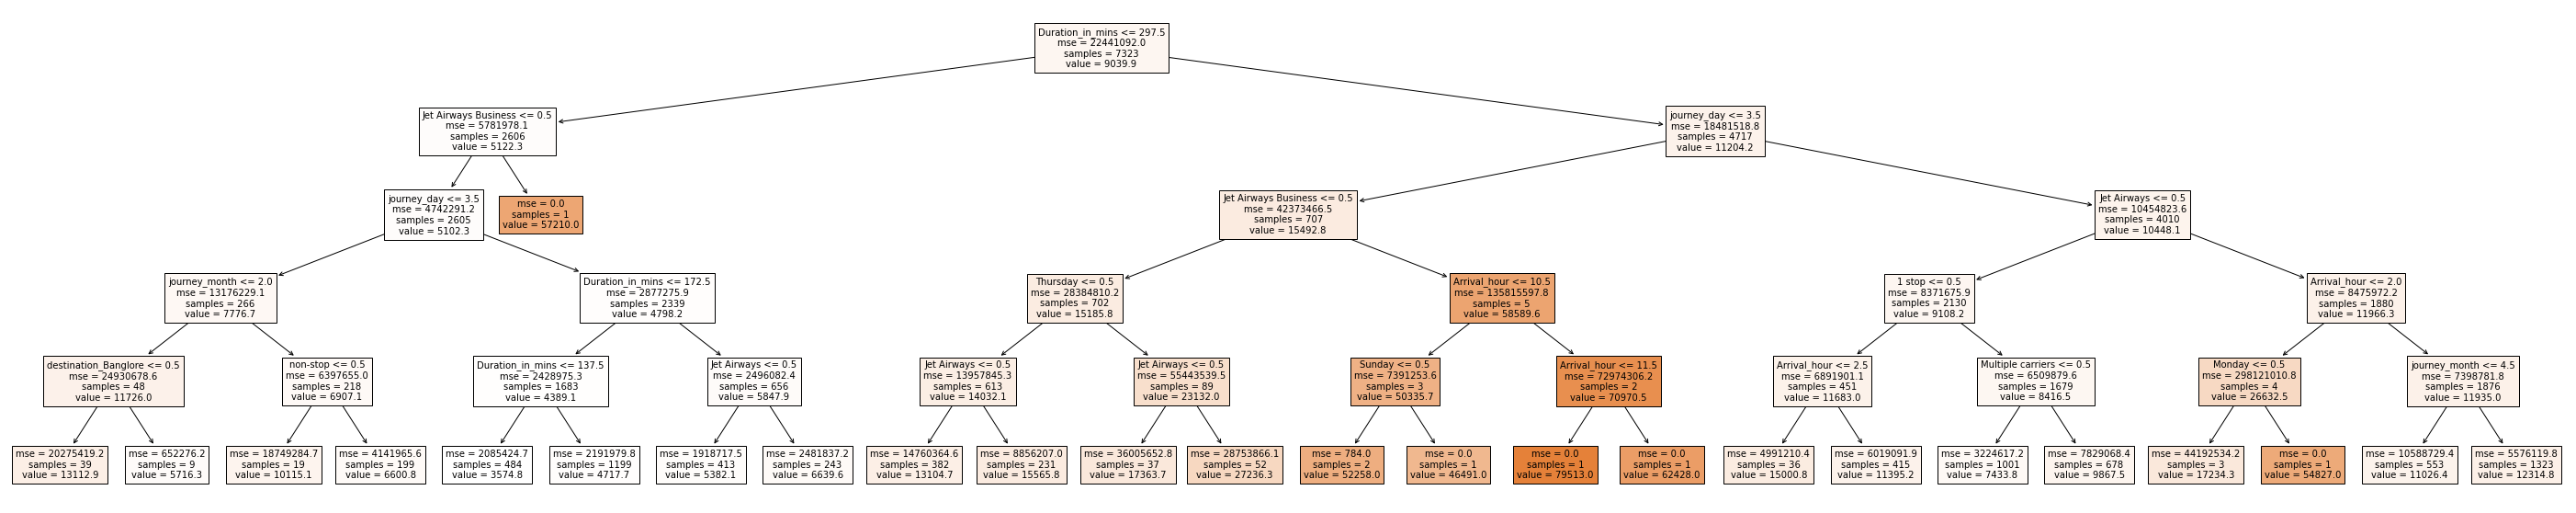

In [19]:
#plot the tree 
plt.figure(figsize=(50, 10))
plot_tree(dt_fit, filled=True, precision= 1, fontsize= 10, feature_names=dt_feature_names)

## KFold and Hypergrid


In [20]:
# create 5 fold CV object
kfold = KFold(n_splits = 5, random_state = 123, shuffle = True)
results = cross_val_score(dt_mod, X_train[[str(s) for s in dt_feature_names]], y_train, cv=kfold, scoring = loss)
np.round(np.abs(results))

array([2907., 2266., 2555., 2556., 2958.])

In [21]:
#create grid of hyperparameter values 
hyper_grid = {
    'ccp_alpha': [1e-1, 1e-5, 1e-10],
    'max_depth': [11, 13, 15],
    'min_samples_split': [32, 35, 37]
}

In [22]:
grid_search = GridSearchCV(dt_mod, hyper_grid, cv = kfold, scoring = loss)
results = grid_search.fit(X_train[[str(s) for s in dt_feature_names]], y_train)
results.best_estimator_

DecisionTreeRegressor(ccp_alpha=1e-05, max_depth=15, min_samples_split=35)

In [23]:
round(abs(results.best_score_), 2)

2249.94

## Feature interpretation


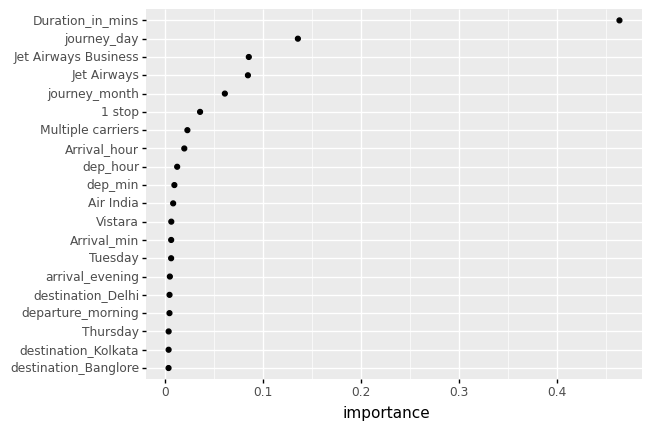

<ggplot: (8757529373540)>

In [24]:
#create final model object 
best_mod = results.best_estimator_
best_mod_fit = best_mod.fit(X_train, y_train)
# extract feature importances
vi = pd.DataFrame({'feature': X_train.columns,
                   'importance': best_mod_fit.feature_importances_})

# get top 20 influential features
top_20_features = vi.nlargest(20, 'importance')

# plot feature importance
(ggplot(top_20_features, aes(x='importance', y='reorder(feature, importance)'))
 + geom_point()
 + labs(y=None))

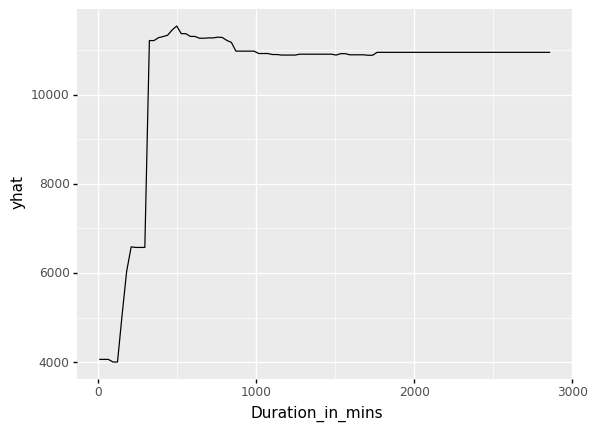

<ggplot: (8757528865314)>

In [25]:
pd_results = partial_dependence(
  best_mod_fit, X_train, 'Duration_in_mins', kind='average',
  percentiles=(0, 1)) 
  
pd_output = pd.DataFrame({'Duration_in_mins': pd_results['values'][0],
                          'yhat': pd_results['average'][0]})
                          
(ggplot(pd_output, aes('Duration_in_mins', 'yhat'))
  + geom_line())

## conclusion

- the decision tree with all features is significantly more accurate (~2249)
- the best hyperparameters for the Full model: DecisionTreeRegressor(ccp_alpha=1e-05, max_depth=15, min_samples_split=35)
- the most influential features are: Duration, journey day, airline (Jet airways business)

# Test


In [48]:
test = pd.read_csv('./dt_encoded_test.csv')


In [51]:
X_train.columns

Index(['journey_month', 'journey_day', 'dep_hour', 'dep_min', 'Arrival_hour',
       'Arrival_min', 'Arrived_next_day', 'Duration_in_mins', 'Air Asia',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'destination_Banglore',
       'destination_Cochin', 'destination_Delhi', 'destination_Hyderabad',
       'destination_Kolkata', 'source_Banglore', 'source_Chennai',
       'source_Delhi', 'source_Kolkata', 'source_Mumbai', '1 stop', '2 stops',
       '3 stops', '4 stops', 'non-stop', 'departure_After noon',
       'departure_early morning', 'departure_evening', 'departure_late night',
       'departure_morning', 'departure_night', 'arrival_After noon',
       'arrival_early morning', 'arrival_evening', 'arrival_late night',
       'arrival_morning', 'arrival_night', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', '

In [50]:
test.columns

Index(['journey_month', 'journey_day', 'dep_hour', 'dep_min', 'Arrival_hour',
       'Arrival_min', 'Arrived_next_day', 'Duration_in_mins', 'Air Asia',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'destination_Banglore',
       'destination_Cochin', 'destination_Delhi', 'destination_Hyderabad',
       'destination_Kolkata', 'source_Banglore', 'source_Chennai',
       'source_Delhi', 'source_Kolkata', 'source_Mumbai', '1 stop', '2 stops',
       '3 stops', '4 stops', 'non-stop', 'departure_After noon',
       'departure_early morning', 'departure_evening', 'departure_late night',
       'departure_morning', 'departure_night', 'arrival_After noon',
       'arrival_early morning', 'arrival_evening', 'arrival_late night',
       'arrival_morning', 'arrival_night', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday',

In [56]:
test['Trujet'] = 0

In [57]:
prices = best_mod_fit.predict(test)

In [58]:
prices

array([10119.        ,  4884.        , 15467.5       , ...,
       12345.81081081, 11688.82352941,  7023.19047619])